In [62]:
import pandas as pd
import pickle
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore') #012

In [63]:
#피클 파일 가져오기
with open('샤워전처리노이즈제거임베딩완.pkl', 'rb') as f:
    df = pickle.load(f)

In [64]:
import pickle

# 피클 파일 가져오기
with open('샤워전처리노이즈제거임베딩완.pkl', 'rb') as f:
    # 👇 encoding='latin1' 대신 'bytes'로 변경
    df = pickle.load(f, encoding='bytes')

# 로드 확인 (데이터의 문자열이 b'...' 형태로 나올 수 있으나, pandas가 처리해줄 수 있음)
print(df.head())

                                             re_text  \
0  선릉역 헬스 시설 선택 시 직장인 운동 지속성을 위한 환경 구축 단계별 점검 선릉역...   
1  지친 하루 감정까지 보듬는 마사지 완벽한 휴식을 위한 3단계 루틴 지친 하루 감정까...   
2  요즘 갑자기 피부가 더 가렵고 각질이 많이 일어난다면 안녕하세요. 수원에서 한의원을...   
3  일상 속 활력 충전! 목 허리 마사지 꿀팁과 잠 깨는 비법 일상 속 활력 충전! 목...   
4  건조 피부 개선 생활 습관 레이저 토닝 전 필수 확인 사항은 환절기만 되면 유독 피...   

                                         tagged_text  \
0  [선릉역, 헬스, 시설, 선택, 시, 직장인, 운동, 속성, 위, 환경, 구축, 단...   
1  [하루, 감정, 마사지, 휴식, 위, 단계, 루틴, 하루, 감정, 마사지, 휴식, ...   
2  [요즘, 갑자기, 피부, 가렵, 각질, 일어난다, 수원, 한의원, 운영, 김원, 겨...   
3  [일상, 속, 활, 충전, 목, 허리, 마사지, 꿀팁, 잠, 비법, 일상, 속, 활...   
4  [건조, 피부, 개선, 생활, 습관, 레이저, 토닝, 전, 필수, 확인, 사항, 환...   

                                              vector  cluster_kmeans  
0  [0.02048825, -0.042857464, 0.027920362, -0.036...               1  
1  [0.0046373787, -0.021668535, 0.019424746, 0.02...               2  
2  [-0.04447499, -0.056259986, 0.022366356, -0.00...               5  
3  [-0.018421305, -0.031610556, 0.05472970

In [65]:
# 피클 파일 가져오기
with open('샤워전처리노이즈제거임베딩완.pkl', 'rb') as f:
    df = pickle.load(f)

# df의 열 목록 출력
print(df.columns)

Index(['re_text', 'tagged_text', 'vector', 'cluster_kmeans'], dtype='object')


In [66]:
df_cluster2 = df[df['cluster_kmeans']==2]
df_cluster2 = df_cluster2.reset_index(drop=True)
df_cluster2

,re_text,tagged_text,vector,cluster_kmeans
0,지친 하루 감정까지 보듬는 마사지 완벽한 휴식을 위한 3단계 루틴 지친 하루 감정까...,"[하루, 감정, 마사지, 휴식, 위, 단계, 루틴, 하루, 감정, 마사지, 휴식, ...","[0.0046373787, -0.021668535, 0.019424746, 0.02...",2
1,일상 속 활력 충전! 목 허리 마사지 꿀팁과 잠 깨는 비법 일상 속 활력 충전! 목...,"[일상, 속, 활, 충전, 목, 허리, 마사지, 꿀팁, 잠, 비법, 일상, 속, 활...","[-0.018421305, -0.031610556, 0.054729704, 0.01...",2
2,수면부족 두통 속울렁거림 혹시 나도 오늘도 늦은 밤까지 뒤척이다 잠들기 힘드셨나요?...,"[수면, 부족, 두통, 속, 오늘, 밤, 뒤척, 수면, 몸, 마음, 꼭, 충전, 때...","[-0.062123917, -0.009554961, 0.033193145, 0.01...",2
3,편안한 수면을 위한 심리적 안정의 기술들 하루를 마무리하고 침대에 누웠을 때 많은 ...,"[수면, 위, 심리, 안정, 기술, 하루, 마무리, 침대, 사람, 불안감, 생각, ...","[-0.0316543, -0.040576193, 0.04916246, 0.02250...",2
4,다크샤워링 불 끄고 하는 샤워가 불안장애 ADHD 완화 효과를 낸다? 안녕하세요! ...,"[다크, 샤워, 링, 불, 샤워, 불안장애, 완화, 효과, 심리, 돋보기, 요즘, ...","[-0.013782848, -0.03286825, 0.0008239752, 0.03...",2
...,...,...,...,...
232,불면증인가 대체 잠을 왤케 못자지... 하루종일 커피든 뭐든 카페인도 안먹음점심먹고...,"[불면증, 대체, 잠, 하루, 종일, 커피, 뭐, 카페인, 점심, 술, 운동, 샤워...","[-0.06391297, -0.026991379, 0.07268536, 0.0318...",2
233,안녕하세요. 밤에 적절한 숙면을 취하지 못하면 다음날 컨디션에 영향을 줘서 힘들죠...,"[밤, 숙면, 취하, 날, 컨디션, 영향, 수면제, 먹기, 질문, 밤, 잠, 여러,...","[-0.021383204, -0.062861025, 0.016258596, 0.03...",2
234,운동 후 근육이 뭉쳤을 때는 가벼운 정적 스트레칭과 폼롤러 마사지가 회복에 도움이...,"[운동, 후, 근육, 정적, 스트레칭, 폼, 롤러, 마사지, 회복, 도움, 종아리,...","[0.0032439553, 0.008517908, 0.012076171, 0.029...",2
235,안녕하세요! 여행 관련 도움을 드리는 지식인 여행전문가 입니다. 첫날 저녁 도착 ...,"[여행, 관련, 도움, 지식인, 여행, 전문가, 첫날, 저녁, 도착, 후, 숙소, ...","[0.046983827, -0.04159698, 0.025516303, 0.0681...",2


In [67]:
# -------------------------------
# 1) 라이브러리 임포트
# -------------------------------
from gensim.models.phrases import Phrases, Phraser
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models

# -------------------------------
# 2) 문서 불러오기 (이미 토큰화된 상태)
# -------------------------------
# 예: df_cluster1['tagged_text'] = [["광파", "오븐", "예열"], ["쿠키", "반죽", "냉동"], ...]
all_document = list(df_cluster2['tagged_text'])

# -------------------------------
# 3) Bigram 학습 & 적용
# -------------------------------
bigram = Phrases(all_document, min_count=3, threshold=10)
bigram_mod = Phraser(bigram)

tokens_bi = [bigram_mod[doc] for doc in all_document]

# -------------------------------
# 4) Dictionary & Corpus 생성
# -------------------------------
id2word = Dictionary(tokens_bi)

# 희귀 단어 / 너무 흔한 단어 제거 (값은 데이터에 맞게 조정)
id2word.filter_extremes(no_below=5, no_above=0.5)

corpus = [id2word.doc2bow(text) for text in tokens_bi]

In [8]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 54.8 MB/s eta 0:00:00


In [9]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.9 MB/s eta 0:00:00


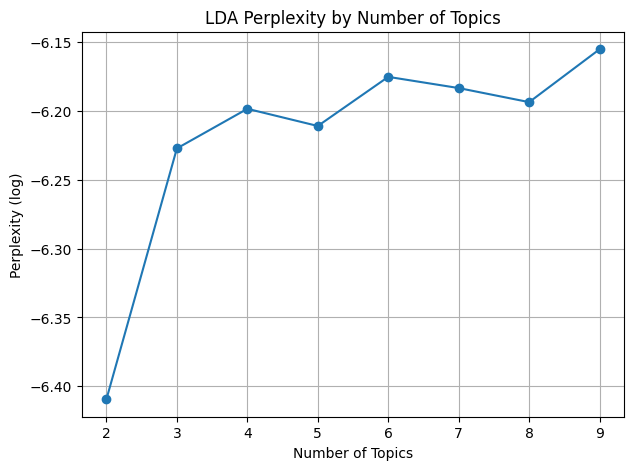

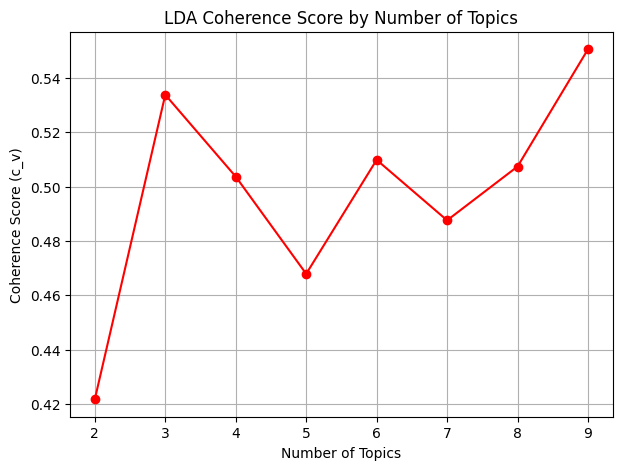

In [68]:
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt

# ---------------------------------
# 1) Coherence & Perplexity 계산
# ---------------------------------
topics_range = range(2, 10)   # 2~9 토픽
perplexity_vals = []
coherence_vals = []

for k in topics_range:
    lda_model = LdaModel(
        corpus=corpus,
        id2word=id2word,
        num_topics=k,
        random_state=42,
        passes=10,
        alpha='auto',
        per_word_topics=True
    )

    # Perplexity
    perplexity = lda_model.log_perplexity(corpus)
    perplexity_vals.append(perplexity)

    # Coherence (c_v 기준)
    coherence_model = CoherenceModel(
        model=lda_model, texts=tokens_bi, dictionary=id2word, coherence='c_v'
    )
    coherence = coherence_model.get_coherence()
    coherence_vals.append(coherence)

# ---------------------------------
# 2) Perplexity 그래프
# ---------------------------------
plt.figure(figsize=(7,5))
plt.plot(topics_range, perplexity_vals, marker='o')
plt.title("LDA Perplexity by Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity (log)")
plt.grid(True)
plt.show()

# ---------------------------------
# 3) hCoherence 그래프
# ---------------------------------
plt.figure(figsize=(7,5))
plt.plot(topics_range, coherence_vals, marker='o', color='red')
plt.title("LDA Coherence Score by Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.grid(True)
plt.show()

In [70]:
# -------------------------------
# 5) LDA 모델 학습
# -------------------------------
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=9,       # 👉 원하는 토픽 수로 변경
    random_state=42,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

# -------------------------------
# 6) LDA 시각화
# -------------------------------
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)     # Jupyter Notebook / Colab 환경일 때
pyLDAvis.save_html(vis, "cluster2_lda_bigrams.html")  # HTML로 저장해서 브라우저에서 확인 가능

In [72]:
#label - document에 대한 토픽 넘버(=action number)
#value - 각 토픽에 배당될 확률
import numpy as np
action_cluster_list =[] #가장 높은 확률값을 가진 토픽 넘버들의 모음
for i in lda_model.get_document_topics(corpus):
    label = [] #0 1 2 3
    value = []#0.5 0.2 0.02 0.41
    for t, s in i:
        label.append(t)
        value.append(s)

    index = np.argmax(value) #value 리스트(확률값들만 모여있는 리스트)에서 가장 값이 큰 요소의 인덱스 반
    action_cluster =label[index] #label 데이터(토픽넘버들만 모아둔 리스트)에서 반환된 인덱스로 인덱싱
    action_cluster_list.append(action_cluster)

In [73]:
df_cluster2['action_cluster'] = action_cluster_list
df_cluster2['action_cluster'].value_counts()

,count
action_cluster,
2,109
1,42
4,32
0,19
5,11
8,11
7,10
3,2
6,1


In [74]:
df_cluster2

,re_text,tagged_text,vector,cluster_kmeans,action_cluster
0,지친 하루 감정까지 보듬는 마사지 완벽한 휴식을 위한 3단계 루틴 지친 하루 감정까...,"[하루, 감정, 마사지, 휴식, 위, 단계, 루틴, 하루, 감정, 마사지, 휴식, ...","[0.0046373787, -0.021668535, 0.019424746, 0.02...",2,2
1,일상 속 활력 충전! 목 허리 마사지 꿀팁과 잠 깨는 비법 일상 속 활력 충전! 목...,"[일상, 속, 활, 충전, 목, 허리, 마사지, 꿀팁, 잠, 비법, 일상, 속, 활...","[-0.018421305, -0.031610556, 0.054729704, 0.01...",2,2
2,수면부족 두통 속울렁거림 혹시 나도 오늘도 늦은 밤까지 뒤척이다 잠들기 힘드셨나요?...,"[수면, 부족, 두통, 속, 오늘, 밤, 뒤척, 수면, 몸, 마음, 꼭, 충전, 때...","[-0.062123917, -0.009554961, 0.033193145, 0.01...",2,1
3,편안한 수면을 위한 심리적 안정의 기술들 하루를 마무리하고 침대에 누웠을 때 많은 ...,"[수면, 위, 심리, 안정, 기술, 하루, 마무리, 침대, 사람, 불안감, 생각, ...","[-0.0316543, -0.040576193, 0.04916246, 0.02250...",2,4
4,다크샤워링 불 끄고 하는 샤워가 불안장애 ADHD 완화 효과를 낸다? 안녕하세요! ...,"[다크, 샤워, 링, 불, 샤워, 불안장애, 완화, 효과, 심리, 돋보기, 요즘, ...","[-0.013782848, -0.03286825, 0.0008239752, 0.03...",2,0
...,...,...,...,...,...
232,불면증인가 대체 잠을 왤케 못자지... 하루종일 커피든 뭐든 카페인도 안먹음점심먹고...,"[불면증, 대체, 잠, 하루, 종일, 커피, 뭐, 카페인, 점심, 술, 운동, 샤워...","[-0.06391297, -0.026991379, 0.07268536, 0.0318...",2,8
233,안녕하세요. 밤에 적절한 숙면을 취하지 못하면 다음날 컨디션에 영향을 줘서 힘들죠...,"[밤, 숙면, 취하, 날, 컨디션, 영향, 수면제, 먹기, 질문, 밤, 잠, 여러,...","[-0.021383204, -0.062861025, 0.016258596, 0.03...",2,4
234,운동 후 근육이 뭉쳤을 때는 가벼운 정적 스트레칭과 폼롤러 마사지가 회복에 도움이...,"[운동, 후, 근육, 정적, 스트레칭, 폼, 롤러, 마사지, 회복, 도움, 종아리,...","[0.0032439553, 0.008517908, 0.012076171, 0.029...",2,7
235,안녕하세요! 여행 관련 도움을 드리는 지식인 여행전문가 입니다. 첫날 저녁 도착 ...,"[여행, 관련, 도움, 지식인, 여행, 전문가, 첫날, 저녁, 도착, 후, 숙소, ...","[0.046983827, -0.04159698, 0.025516303, 0.0681...",2,5


In [ ]:
# ◆ 4. LDA 분석을 위한 후작업
* LDAvis와 LDA모델의 토픽 넘버 매칭
* LDAvis 결과와 LDA모델의 결과를 보고 직접 매칭해야한다.

In [75]:
lda_model.show_topics(num_topics=9, formatted=True)

[(0,
  '0.046*"다크_샤워" + 0.045*"조명" + 0.041*"샤워" + 0.018*"불_샤워" + 0.014*"뇌" + 0.013*"빛" + 0.012*"숙면" + 0.010*"자극" + 0.010*"불" + 0.010*"밤"'),
 (1,
  '0.034*"밤" + 0.030*"멜라토닌" + 0.022*"식물성_멜라토닌" + 0.017*"성분" + 0.014*"휴식" + 0.011*"생각" + 0.011*"마음" + 0.010*"잠" + 0.010*"타트_체리" + 0.010*"자연"'),
 (2,
  '0.188*"마사지" + 0.013*"근육_이완" + 0.012*"목" + 0.010*"힐링" + 0.010*"셀프_마사지" + 0.009*"꿀팁" + 0.009*"스트레스_해소" + 0.008*"피로" + 0.008*"촉진" + 0.008*"실천"'),
 (3,
  '0.027*"멜라토닌" + 0.019*"밤" + 0.016*"피부" + 0.016*"수면_유도" + 0.016*"복용" + 0.013*"잠_안" + 0.011*"수면" + 0.010*"성분" + 0.010*"안정" + 0.009*"날"'),
 (4,
  '0.051*"수면" + 0.017*"뇌" + 0.016*"잠" + 0.014*"숙면" + 0.011*"밤" + 0.010*"수면_질" + 0.009*"유지" + 0.008*"샤워" + 0.008*"환경" + 0.008*"조명"'),
 (5,
  '0.060*"운동" + 0.022*"헬스" + 0.018*"수험생" + 0.015*"헬스장" + 0.013*"수능" + 0.012*"준비" + 0.011*"이제" + 0.011*"짐" + 0.010*"공간" + 0.009*"트레이너"'),
 (6,
  '0.090*"눈" + 0.024*"관리" + 0.024*"활" + 0.017*"통제" + 0.017*"직전" + 0.015*"순간" + 0.014*"즉각" + 0.014*"아침" + 0.012*"마사지" + 0.011*"출처"'),


In [76]:
df_cluster2['action_cluster']

,action_cluster
0,2
1,2
2,1
3,4
4,0
...,...
232,8
233,4
234,7
235,5


In [77]:
lda_model.show_topics(num_topics=9, formatted=True)

[(0,
  '0.046*"다크_샤워" + 0.045*"조명" + 0.041*"샤워" + 0.018*"불_샤워" + 0.014*"뇌" + 0.013*"빛" + 0.012*"숙면" + 0.010*"자극" + 0.010*"불" + 0.010*"밤"'),
 (1,
  '0.034*"밤" + 0.030*"멜라토닌" + 0.022*"식물성_멜라토닌" + 0.017*"성분" + 0.014*"휴식" + 0.011*"생각" + 0.011*"마음" + 0.010*"잠" + 0.010*"타트_체리" + 0.010*"자연"'),
 (2,
  '0.188*"마사지" + 0.013*"근육_이완" + 0.012*"목" + 0.010*"힐링" + 0.010*"셀프_마사지" + 0.009*"꿀팁" + 0.009*"스트레스_해소" + 0.008*"피로" + 0.008*"촉진" + 0.008*"실천"'),
 (3,
  '0.027*"멜라토닌" + 0.019*"밤" + 0.016*"피부" + 0.016*"수면_유도" + 0.016*"복용" + 0.013*"잠_안" + 0.011*"수면" + 0.010*"성분" + 0.010*"안정" + 0.009*"날"'),
 (4,
  '0.051*"수면" + 0.017*"뇌" + 0.016*"잠" + 0.014*"숙면" + 0.011*"밤" + 0.010*"수면_질" + 0.009*"유지" + 0.008*"샤워" + 0.008*"환경" + 0.008*"조명"'),
 (5,
  '0.060*"운동" + 0.022*"헬스" + 0.018*"수험생" + 0.015*"헬스장" + 0.013*"수능" + 0.012*"준비" + 0.011*"이제" + 0.011*"짐" + 0.010*"공간" + 0.009*"트레이너"'),
 (6,
  '0.090*"눈" + 0.024*"관리" + 0.024*"활" + 0.017*"통제" + 0.017*"직전" + 0.015*"순간" + 0.014*"즉각" + 0.014*"아침" + 0.012*"마사지" + 0.011*"출처"'),


In [78]:
# 0 -> 4
# 1 -> 2
# 2 -> 3
# 3 -> 1
# 4 -> 6
# 5 -> 2

new_action_n =[]

for i in df_cluster2['action_cluster']:

    if i == 0:
        n=4
    elif i ==1 :
        n=2
    elif i == 2:
        n=1
    elif i == 3:
        n=8
    elif i == 4:
        n=3
    elif i == 5:
        n=6
    elif i == 6:
        n=9
    elif i == 7:
        n=7
    elif i == 8:
        n=5



    new_action_n.append(n)

    # elif i == 3:
    #     n=1
    # elif i == 4:
    #     n=6
    # elif i == 5:
    #     n=2

In [79]:
df_cluster2['action_cluster'] = new_action_n
df_cluster2.head()

,re_text,tagged_text,vector,cluster_kmeans,action_cluster
0,지친 하루 감정까지 보듬는 마사지 완벽한 휴식을 위한 3단계 루틴 지친 하루 감정까...,"[하루, 감정, 마사지, 휴식, 위, 단계, 루틴, 하루, 감정, 마사지, 휴식, ...","[0.0046373787, -0.021668535, 0.019424746, 0.02...",2,1
1,일상 속 활력 충전! 목 허리 마사지 꿀팁과 잠 깨는 비법 일상 속 활력 충전! 목...,"[일상, 속, 활, 충전, 목, 허리, 마사지, 꿀팁, 잠, 비법, 일상, 속, 활...","[-0.018421305, -0.031610556, 0.054729704, 0.01...",2,1
2,수면부족 두통 속울렁거림 혹시 나도 오늘도 늦은 밤까지 뒤척이다 잠들기 힘드셨나요?...,"[수면, 부족, 두통, 속, 오늘, 밤, 뒤척, 수면, 몸, 마음, 꼭, 충전, 때...","[-0.062123917, -0.009554961, 0.033193145, 0.01...",2,2
3,편안한 수면을 위한 심리적 안정의 기술들 하루를 마무리하고 침대에 누웠을 때 많은 ...,"[수면, 위, 심리, 안정, 기술, 하루, 마무리, 침대, 사람, 불안감, 생각, ...","[-0.0316543, -0.040576193, 0.04916246, 0.02250...",2,3
4,다크샤워링 불 끄고 하는 샤워가 불안장애 ADHD 완화 효과를 낸다? 안녕하세요! ...,"[다크, 샤워, 링, 불, 샤워, 불안장애, 완화, 효과, 심리, 돋보기, 요즘, ...","[-0.013782848, -0.03286825, 0.0008239752, 0.03...",2,4


In [80]:
df_cluster2['action_cluster'].value_counts()

,count
action_cluster,
1,109
2,42
3,32
4,19
6,11
5,11
7,10
8,2
9,1


In [81]:
with open('cluster2_action.pkl', 'wb') as f:
    pickle.dump(df_cluster2, f)

In [82]:
with open('cluster2_action.pkl', 'rb') as f:
    df2 = pickle.load(f)

In [83]:
df2

,re_text,tagged_text,vector,cluster_kmeans,action_cluster
0,지친 하루 감정까지 보듬는 마사지 완벽한 휴식을 위한 3단계 루틴 지친 하루 감정까...,"[하루, 감정, 마사지, 휴식, 위, 단계, 루틴, 하루, 감정, 마사지, 휴식, ...","[0.0046373787, -0.021668535, 0.019424746, 0.02...",2,1
1,일상 속 활력 충전! 목 허리 마사지 꿀팁과 잠 깨는 비법 일상 속 활력 충전! 목...,"[일상, 속, 활, 충전, 목, 허리, 마사지, 꿀팁, 잠, 비법, 일상, 속, 활...","[-0.018421305, -0.031610556, 0.054729704, 0.01...",2,1
2,수면부족 두통 속울렁거림 혹시 나도 오늘도 늦은 밤까지 뒤척이다 잠들기 힘드셨나요?...,"[수면, 부족, 두통, 속, 오늘, 밤, 뒤척, 수면, 몸, 마음, 꼭, 충전, 때...","[-0.062123917, -0.009554961, 0.033193145, 0.01...",2,2
3,편안한 수면을 위한 심리적 안정의 기술들 하루를 마무리하고 침대에 누웠을 때 많은 ...,"[수면, 위, 심리, 안정, 기술, 하루, 마무리, 침대, 사람, 불안감, 생각, ...","[-0.0316543, -0.040576193, 0.04916246, 0.02250...",2,3
4,다크샤워링 불 끄고 하는 샤워가 불안장애 ADHD 완화 효과를 낸다? 안녕하세요! ...,"[다크, 샤워, 링, 불, 샤워, 불안장애, 완화, 효과, 심리, 돋보기, 요즘, ...","[-0.013782848, -0.03286825, 0.0008239752, 0.03...",2,4
...,...,...,...,...,...
232,불면증인가 대체 잠을 왤케 못자지... 하루종일 커피든 뭐든 카페인도 안먹음점심먹고...,"[불면증, 대체, 잠, 하루, 종일, 커피, 뭐, 카페인, 점심, 술, 운동, 샤워...","[-0.06391297, -0.026991379, 0.07268536, 0.0318...",2,5
233,안녕하세요. 밤에 적절한 숙면을 취하지 못하면 다음날 컨디션에 영향을 줘서 힘들죠...,"[밤, 숙면, 취하, 날, 컨디션, 영향, 수면제, 먹기, 질문, 밤, 잠, 여러,...","[-0.021383204, -0.062861025, 0.016258596, 0.03...",2,3
234,운동 후 근육이 뭉쳤을 때는 가벼운 정적 스트레칭과 폼롤러 마사지가 회복에 도움이...,"[운동, 후, 근육, 정적, 스트레칭, 폼, 롤러, 마사지, 회복, 도움, 종아리,...","[0.0032439553, 0.008517908, 0.012076171, 0.029...",2,7
235,안녕하세요! 여행 관련 도움을 드리는 지식인 여행전문가 입니다. 첫날 저녁 도착 ...,"[여행, 관련, 도움, 지식인, 여행, 전문가, 첫날, 저녁, 도착, 후, 숙소, ...","[0.046983827, -0.04159698, 0.025516303, 0.0681...",2,6


In [84]:
#csv

df2.to_excel('cluster2_action.xlsx')

In [85]:
import pickle

file_to_check = 'cluster2_action.pkl'

try:
    with open(file_to_check, 'rb') as f:
        data = pickle.load(f)

    print(f"'{file_to_check}' 파일은 정상입니다.")
    # print(data.head()) # 정상일 경우 내용 확인

except EOFError:
    print("--- [!! 확실한 증거 !!] ---")
    print(f"오류: EOFError (Ran out of input)")
    print(f"'{file_to_check}' 파일이 비어있거나, 저장 도중 끊겨서 손상되었습니다.")
    print("파일을 다시 만드셔야 합니다.")

except Exception as e:
    print(f"다른 오류가 발생했습니다: {e}")

'cluster2_action.pkl' 파일은 정상입니다.
